<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/17_Predicting_Revenue_based_on_Temperature_by_employing_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b63; overflow:hidden"><b> Predicting Revenue based on Temperature by employing Simple Linear Regression </b></div>



# Problem statement
### warning: this project is low level very simle project for explaining simple linear regression

- We have dataset consisting of 2 columns, namely Revenue, Temperature
- Aim is to  predict Revenue  based on Temperature
- Also use evaluation model for accuracy


#

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#

# *2.Import Datasets*

In [ ]:
simple_df=pd.read_csv('Desktop/ARTIFICIAL INTELLIGENT/Courses/ML Regression Course Package/3. Simple Linear Regression/IceCreamData.csv')
simple_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


#

# *3.Data Analysis and Visualization*

In [ ]:
simple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
simple_df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [ ]:
simple_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
simple_df.corr()


,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


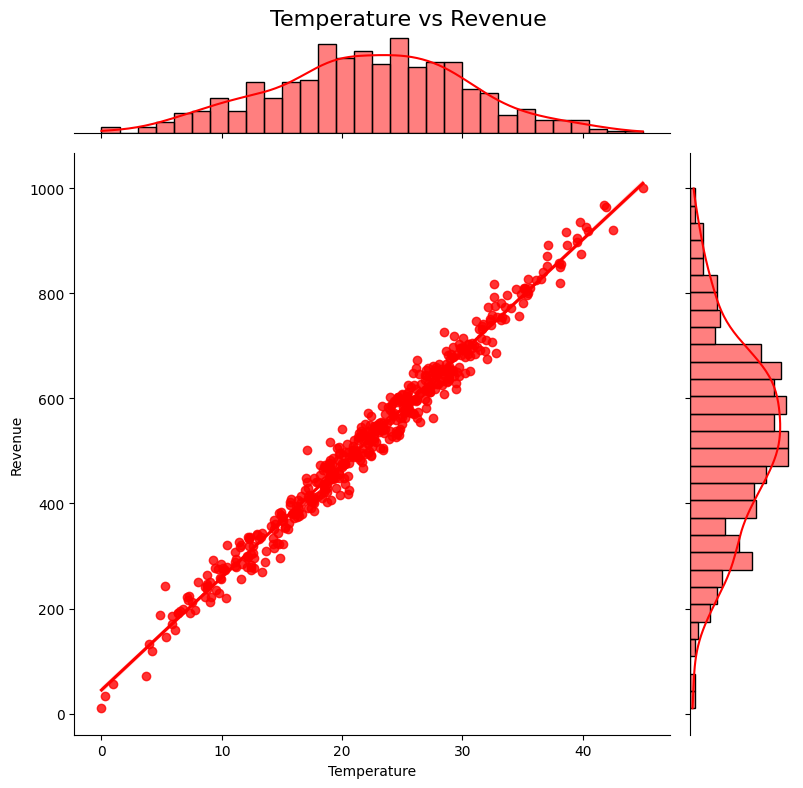

In [ ]:
# visualization
sns.jointplot(x='Temperature',y='Revenue',data=simple_df,color='red',kind='reg',height=8,ratio=5,marginal_kws=dict(bins=30, fill=True) )

plt.suptitle('Temperature vs Revenue', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

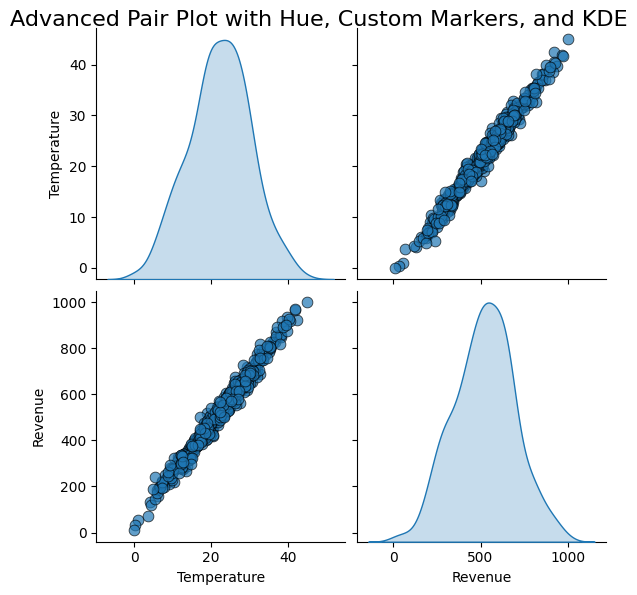

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(
    simple_df,
    palette='husl',
    markers=['o', 's', 'D'],
    diag_kind='kde',
    kind='scatter',
    plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'k'},
    diag_kws={'shade': True},
    height=3,
)

plt.suptitle('Advanced Pair Plot with Hue, Custom Markers, and KDE', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


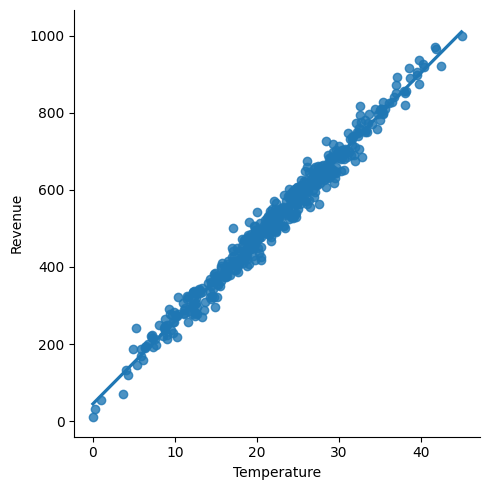

In [ ]:
sns.lmplot(x='Temperature',y='Revenue',data=simple_df)

#

# *4.Split dataset(Train and Test)*

In [ ]:
X=simple_df[['Temperature']]
Y=simple_df['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(350, 1) (150, 1) (350,) (150,)


#

# *5.Train Model*

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)
print('Liner model slope is :', model.coef_)
print('Liner model intercept is :', model.intercept_)

Liner model slope is : [21.41933632]
Liner model intercept is : 45.68626765673889


#

# *6.Evaluation*

In [ ]:
y_pred=model.predict(X_train)
pd.DataFrame(y_pred)

,0
0,353.107590
1,600.986224
2,381.466207
3,601.204790
4,305.353182
...,...
345,554.640455
346,573.214780
347,863.587895
348,386.610943


Text(0.5, 1.0, 'Comparison of Actual and predicted values')

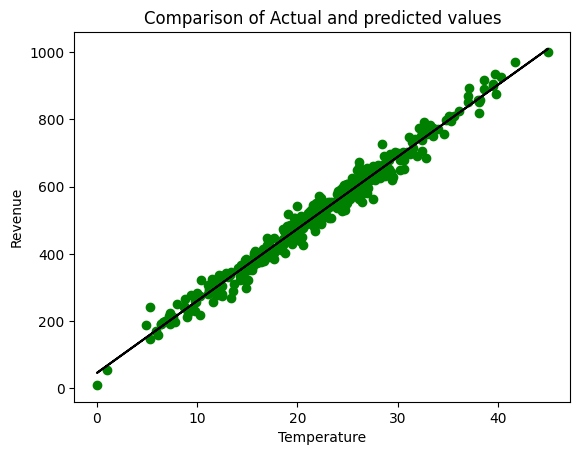

In [ ]:
# visulaize prediction and actual values
plt.scatter(X_train,Y_train, color='green')
plt.plot(X_train,y_pred,color='black')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Comparison of Actual train and predicted values')

Text(0.5, 1.0, 'Comparison of Actual test and predicted values')

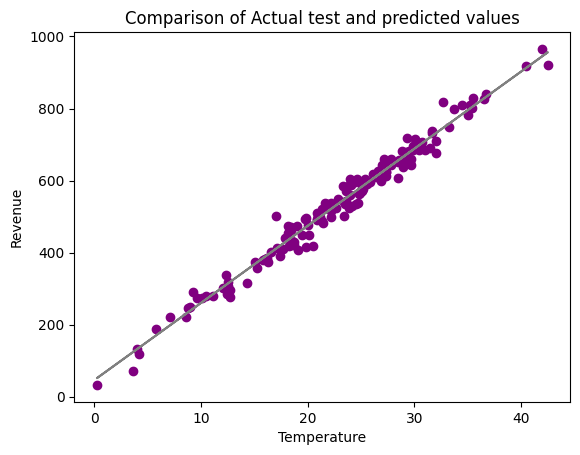

In [ ]:
# visulaize prediction and actual values
plt.scatter(X_test,Y_test, color='purple')
plt.plot(X_test,model.predict(X_test),color='gray')
plt.ylabel('Revenue')
plt.xlabel('Temperature')
plt.title('Comparison of Actual test and predicted values')

In [ ]:
# giving new values
A=[[25]]
revenue=model.predict(A)
revenue

array([581.16967569])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r2 = r2_score(Y_train, y_pred)
print(f'R-squared: {r2:.2f}')

mse = mean_squared_error(Y_train, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

mae = mean_absolute_error(Y_train, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

mape = np.mean(np.abs((Y_train - y_pred) / Y_train)) * 100
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

n = len(Y_train)
p = X_train.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2:.2f}')



R-squared: 0.98
Mean Squared Error: 636.28
Root Mean Squared Error: 25.22
Mean Absolute Error: 19.89
Mean Absolute Percentage Error: 5.43%
Adjusted R-squared: 0.98


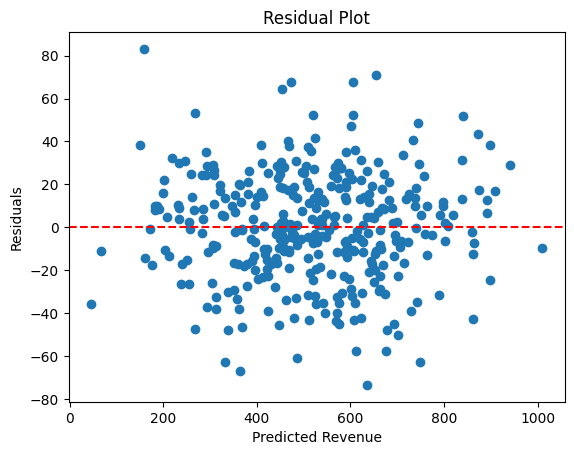

In [ ]:
plt.scatter(y_pred, Y_train - y_pred)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.show()


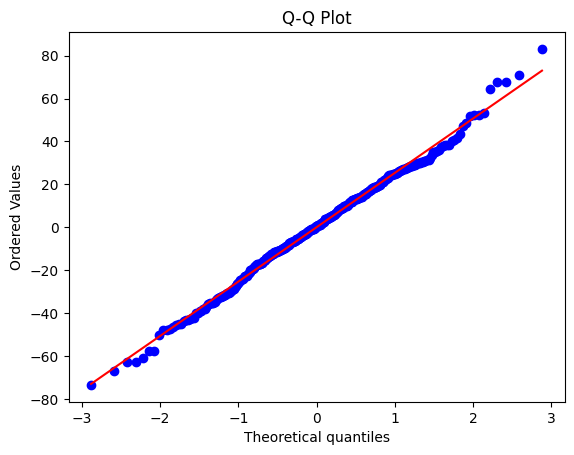

In [ ]:
import scipy.stats as stats

stats.probplot(Y_train - y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
print(f'Cross-Validated R-squared Scores: {cv_scores}')
print(f'Mean Cross-Validated R-squared: {cv_scores.mean():.2f}')


Cross-Validated R-squared Scores: [0.98441089 0.97695706 0.97404612 0.98370302 0.9749989 ]
Mean Cross-Validated R-squared: 0.98


In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

ols_model = sm.OLS(Y_train, X_train_const).fit()

predictions = ols_model.get_prediction(sm.add_constant(X_test))
pred_summary = predictions.summary_frame()

print(pred_summary[['mean', 'mean_ci_lower', 'mean_ci_upper']])


           mean  mean_ci_lower  mean_ci_upper
361  681.930154     678.270709     685.589599
73   632.049189     628.863071     635.235306
374  559.421357     556.683780     562.158933
155  498.577720     495.903900     501.251540
104  615.334675     612.281250     618.388100
..          ...            ...            ...
266  442.077457     439.185312     444.969602
23   393.937275     390.686643     397.187907
222  599.717606     596.773668     602.661545
261  550.692386     547.983241     553.401531
426  605.205119     602.224411     608.185828

[150 rows x 3 columns]


In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(ols_model.resid)
print(f'Durbin-Watson: {dw:.2f}')


Durbin-Watson: 1.95


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
print(f'Breusch-Pagan p-value: {bp_test[1]:.4f}')


Breusch-Pagan p-value: 0.9037


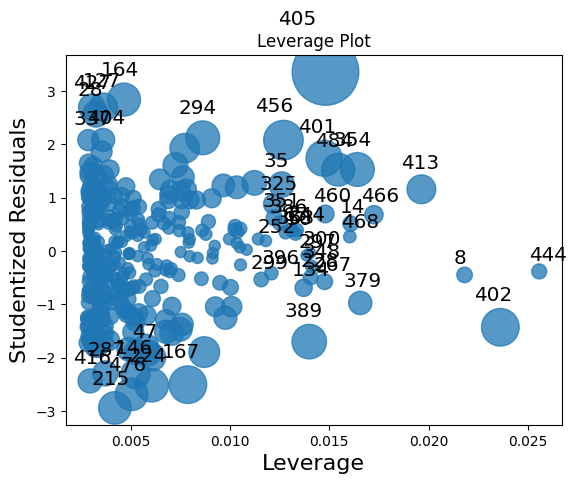

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(ols_model)
plt.title('Leverage Plot')
plt.show()
